# Problem Set 1, due April 8th at 12:00pm 
(in other words, it is due at noon, or one minute after 11:59am).

### Before You Start
For this problem set, you should download INF0371-PS1.ipynb from Canvas. Create a local copy of the notebook and rename it LASTNAME_FIRSTNAME-PS1.ipynb. Then edit your renamed file directly in your browser by typing:
```
ipython notebook <name_of_downloaded_file>
```

Make sure the following libraries load correctly (hit Ctrl-Enter).


In [1]:
#IPython is what you are using now to run the notebook
import IPython
print "IPython version:      %6.6s (need at least 1.0)" % IPython.__version__

# Numpy is a library for working with Arrays
import numpy as np
print "Numpy version:        %6.6s (need at least 1.7.1)" % np.__version__

# SciPy implements many different numerical algorithms
import scipy as sp
print "SciPy version:        %6.6s (need at least 0.12.0)" % sp.__version__

# Pandas makes working with data tables easier
import pandas as pd
print "Pandas version:       %6.6s (need at least 0.11.0)" % pd.__version__

# Module for plotting
import matplotlib
print "Maplotlib version:    %6.6s (need at least 1.2.1)" % matplotlib.__version__

# SciKit Learn implements several Machine Learning algorithms
import sklearn
print "Scikit-Learn version: %6.6s (need at least 0.13.1)" % sklearn.__version__

IPython version:       4.1.2 (need at least 1.0)
Numpy version:        1.10.4 (need at least 1.7.1)
SciPy version:        0.17.0 (need at least 0.12.0)
Pandas version:       0.18.0 (need at least 0.11.0)
Maplotlib version:     1.5.1 (need at least 1.2.1)
Scikit-Learn version: 0.17.1 (need at least 0.13.1)


### Working in a group?
List the names of other students with whom you worked on this problem set:
- *Person 1*
- *Person 2*
- ...

---

## Introduction to the assignment

For this assignment, you will be using the [Boston Housing Prices Data Set](http://archive.ics.uci.edu/ml/datasets/Housing).  Please read about the dataset carefully before continuing -- it is worth investing a few minutes up front otherwise you are likely to be hopelessly confused! Also, if you're new to analyzing data in Python, please make sure to read the relevant readings linked to on Canvas before beginning, otherwise you'll be stabbing in the dark.

Use the following commands to load the dataset:

In [21]:
from sklearn.datasets import load_boston
bdata = load_boston()

The following commands will provide some basic information about the shape of the data:

In [156]:
# print bdata.keys()
# print bdata.feature_names
print bdata.data.shape
# print bdata.target.shape

# uncomment the following if you want to see a lengthy description of the dataset
# print bdata.DESCR
# print bdata.target

(506, 13)


In [5]:
# add MEDV as a column/attribute name
bdata.feature_names = np.append(bdata.feature_names, 'MEDV')

In [6]:
boston = pd.DataFrame(bdata.data)
boston['MEDV'] = bdata.target # add MEDV(target) values into the boston dataframe

In [7]:
boston.columns = bdata.feature_names[:]
print boston.shape
# print boston

(506, 14)


---

## Part 1: Descriptive analysis

### 1.1: Explore the data

Let's dig into the data a bit to see what we're dealing with. The first thing to do is to make sure you understand how the data is organized, what the data types are, whether there is any missing data, and so forth. Get your bearings on your own, then answer the following questions.

 - 1.1.1: How many different variables are there in the dataset, and how many different observations?
 - 1.1.2: How many instances are classified as neighborhoods where the tract bounds the Charles River? 
 - 1.1.3: Show that dataset does not contain any missing values.
 - 1.1.4: Display the property tax rate in the 5 neighborhoods that have the highest median housing price.

In [8]:
# 1.1.1
print boston.shape

(506, 14)


In [9]:
# 1.1.2
print sum(boston['CHAS'] == 1) # 35

35


In [10]:
# 1.1.3
boston.isnull().values.any() # false: no NaN values

False

In [11]:
# 1.1.4
highMedv = boston.sort_values(['MEDV'], ascending=False)
print highMedv['TAX'].head(5)

283    198
225    307
369    666
370    666
371    666
Name: TAX, dtype: float64


*Provide our answers below:*

 - 1.1.1: 14 variables including target variable MEDV, 506 observations
 - 1.1.2: 35
 - 1.1.3: in code above
 - 1.1.4: in code above

### 1.2: Answer some basic questions
 - 1.2.1: What is the median housing price in Boston's most expensive neighborhood?
 - 1.2.2: How many neighborhoods have, on average, less than 5 rooms per dwelling?
 - 1.2.3: What is the property tax rate in the most expensive neighborhood that is also adjacent to the Charles River?
 - 1.2.4: What is the crime rate in the neighborhood with the highest median housing price? 
 - 1.2.5: What is the crime rate in the neighborhood with the lowest median housing price?

In [12]:
# 1.2.1
# highMedv.head()

In [13]:
# 1.2.2
sum(boston['RM'] < 5)

15

In [14]:
# 1.2.3
highMedv[highMedv['CHAS'] == 1].head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
283,0.01501,90,1.21,1,0.401,7.923,24.8,5.8850,1,198,13.6,395.52,3.16,50
369,5.66998,0,18.10,1,0.631,6.683,96.8,1.3567,24,666,20.2,375.33,3.73,50
370,6.53876,0,18.10,1,0.631,7.016,97.5,1.2024,24,666,20.2,392.05,2.96,50
372,8.26725,0,18.10,1,0.668,5.875,89.6,1.1296,24,666,20.2,347.88,8.88,50
163,1.51902,0,19.58,1,0.605,8.375,93.9,2.1620,5,403,14.7,388.45,3.32,50


In [29]:
# 1.2.4
highMedv.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
283,0.01501,90,1.21,1,0.401,7.923,24.8,5.8850,1,198,13.6,395.52,3.16,50
225,0.52693,0,6.20,0,0.504,8.725,83.0,2.8944,8,307,17.4,382.00,4.63,50
369,5.66998,0,18.10,1,0.631,6.683,96.8,1.3567,24,666,20.2,375.33,3.73,50
370,6.53876,0,18.10,1,0.631,7.016,97.5,1.2024,24,666,20.2,392.05,2.96,50
371,9.23230,0,18.10,0,0.631,6.216,100.0,1.1691,24,666,20.2,366.15,9.53,50


In [16]:
# 1.2.5
highMedv.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
414,45.74610,0,18.1,0,0.693,4.519,100.0,1.6582,24,666,20.2,88.27,36.98,7.0
399,9.91655,0,18.1,0,0.693,5.852,77.8,1.5004,24,666,20.2,338.16,29.97,6.3
400,25.04610,0,18.1,0,0.693,5.987,100.0,1.5888,24,666,20.2,396.90,26.77,5.6
398,38.35180,0,18.1,0,0.693,5.453,100.0,1.4896,24,666,20.2,396.90,30.59,5.0
405,67.92080,0,18.1,0,0.693,5.683,100.0,1.4254,24,666,20.2,384.97,22.98,5.0


*Provide our answers below:*

 - 1.2.1: $50,000 (most expensive neighborhood arbitrary)
 - 1.2.2: 15
 - 1.2.3: $198 per $10,000 (most expensive neighborhood arbitrary)
 - 1.2.4: 0.01501 per capita (MANY TIES)
 - 1.2.5: 38.352 AND 67.921 per capita (tie)

### 1.3: Summary statistics

Create a clean, organized table that shows just the following information (no more, no less) for each variable in the dataset. Note that your table should have K rows (one for each variable) and 7 columns, ordered as below:
 - The name of the variable
 - The number of observations with non-missing values
 - The mean of the variable
 - The standard deviation of the variable
 - The minimum value of the variable
 - The median of the variable
 - The maximum value of the variable

In [17]:
variableNames = bdata.feature_names
bostonSum = boston.describe().transpose()
bostonSum.drop(bostonSum.columns[4:7], axis=1, inplace=True)
bostonSum.insert(4,'median', boston.median())
bostonSum

,count,mean,std,min,median,max
CRIM,506,3.593761,8.596783,0.00632,0.25651,88.9762
ZN,506,11.363636,23.322453,0.00000,0.00000,100.0000
INDUS,506,11.136779,6.860353,0.46000,9.69000,27.7400
CHAS,506,0.069170,0.253994,0.00000,0.00000,1.0000
NOX,506,0.554695,0.115878,0.38500,0.53800,0.8710
RM,506,6.284634,0.702617,3.56100,6.20850,8.7800
AGE,506,68.574901,28.148861,2.90000,77.50000,100.0000
DIS,506,3.795043,2.105710,1.12960,3.20745,12.1265
RAD,506,9.549407,8.707259,1.00000,5.00000,24.0000
TAX,506,408.237154,168.537116,187.00000,330.00000,711.0000


### 1.4 Simple statistical tests

Using a t-test, compare the median house value in locations that are adjacent to the Charles River to locations that are not adjacent to the Charles River. Do you reject the null hypothesis that prices are equivalent?

In [158]:
adjCR = boston[boston['CHAS'] == 1]['MEDV']
farCR = boston[boston['CHAS'] == 0]['MEDV']
sp.stats.ttest_ind(adjCR, farCR)

Ttest_indResult(statistic=3.9964374660905091, pvalue=7.3906231705199048e-05)

*Write your response here.*

Using an alpha level of 0.05, we reject the null hypothesis that the prices are equivalent because the p-value, 7.39e-05, is less than the alpha level.

---

## Part 2: Histograms and Scatterplots


### 2.1: Histogram of housing prices

Below you will find some very basic code to make a very basic histogram of median housing prices (the "target" variable) for your dataset.  Your first task is to make this graph look pretty by doing the following:

1. Add appropriate labels to the x and y axes, make sure to include units
2. Change the bin width on the histogram to be $1000
3. Remove the axes on the top and right side of the plot window
4. Change the color of the bars to be green, and remove the black borders from the bars


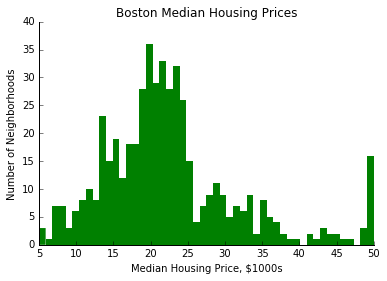

In [25]:
# prepare IPython to work with matplotlib and import the library to something convenient
%matplotlib inline
import matplotlib.pyplot as plt 

# edit the code below to make the graph look good
ax = plt.subplot(111)
ax.hist(bdata.target, bins=50, color='green', edgecolor='none')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
plt.xlabel('Median Housing Price, $1000s')
plt.ylabel('Number of Neighborhoods')
plt.title('Boston Median Housing Prices')
plt.show()

### 2.2: Scatter plot of housing prices and crime

Use matplotlib to create a scatter plot that shows the relationship between the median value of the home (y-axis) and the per-capita crime rate (x-axis).  Properly label your axes, and make sure that your graphic looks polished and professional.


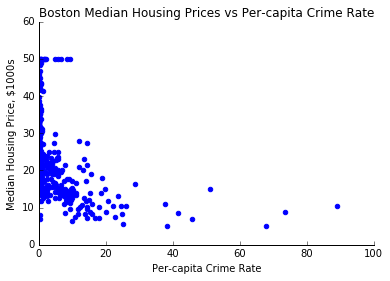

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt 

ax = plt.subplot(111)
y = bdata.target
x = boston['CRIM']
ax.scatter(x, y, color='blue')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.set_xlim(xmin=0)
plt.ylabel('Median Housing Price, $1000s')
plt.xlabel('Per-capita Crime Rate')
plt.title('Boston Median Housing Prices vs Per-capita Crime Rate')
plt.show()

In [42]:
# sp.stats.ttest_ind(x, y)
# p-value = 2.056e-168
# print np.corrcoef(x,y) # coeff: -0.3858
# sp.stats.pearsonr(x,y) # r: -0.3858


(-0.38583168988399053, 2.0835501108141935e-19)

### 2.3: Interpret

What do you observe in the above scatter plot? Does there appear to be a relationship between crime rates and housing prices in Boston? Calculate the correlation between these two variables. Do you think this relationship is causal, or just a correlation? Justify your position.

*thoughts*
By looking at the scatter plot I can see that there are less than 10 observations where the per-capita crime rate is above 30. Ignoring those points, it seems that there might be a negative correlation between the per-capita crime rate and median housing price. Calculating the correlation coefficient gives us an r value of -0.3858 which is not strong enough to say with certainty that the relationship between these two variables are causal. 

### 2.4 Correlation Matrix

Calculate the correlation of every pair of variables in the dataset. Create a *K* x *K* matrix where the value in the (*i*,*j*) cell is the correlation between the *i*th and *j*th variable. Show off your skills by coloring the cell so that large positive correlations appear green and large negative correlations appear green (use a gradient to make this pretty). What two variables appear to me most positively and negatively correlated?

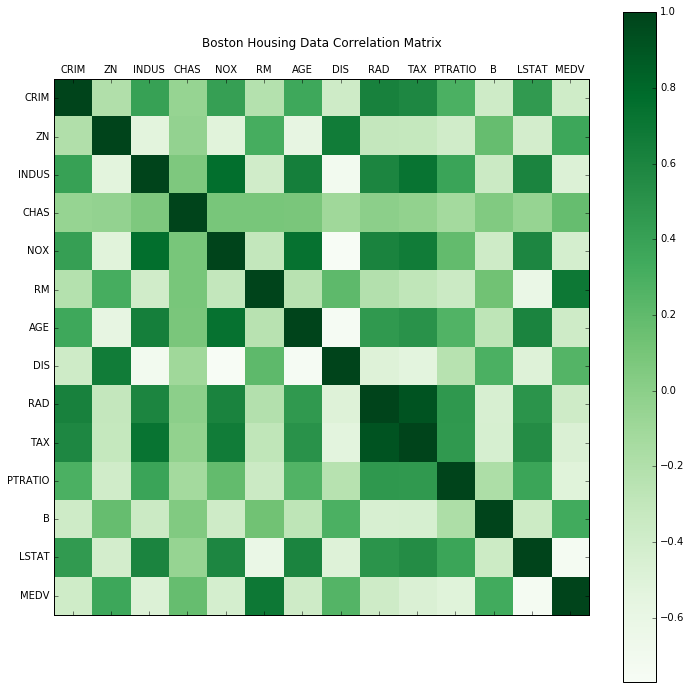

In [120]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12,12))
corr = boston.corr()
sdf = ax.matshow(corr, cmap=plt.cm.Greens, interpolation='nearest')
# searched for a very long time for a symmetrical color map but failed to find one :(
varss = list(boston.columns.values)
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns);
plt.title('Boston Housing Data Correlation Matrix')
fig.colorbar(sdf)

*reponse*
Access to radial highways and high tax seem to be correlated. This makes sense because areas with access to radial highways might be the areas to be taxed for those highways. A neighborhood that's far away from the radial highways might have lower taxes because they might not pay taxes for them. Conversely, areas with already high amounts of taxes might have accumulated the tax dollars to build those highways. We see a negative correlation between older units and distance to employment centers. One reason this might be the case is that living units may be being built closer to employment centers. We also observe a strong negative correlation between LSTAT and MEDV.

### 2.5 Create your own (creative and effective) visualization

Use another type of graph or chart to illustrate an interesting pattern in the data.  Be creative in your visualization, and make sure to produce a "publication-quality" graph.  Points will be given for useful and creative graphs; points will be deducted for confusing issues like unlabeled axes.  If you're new to data visualization, [this guide](http://pubs.aeaweb.org/doi/pdfplus/10.1257/jep.28.1.209) is a good place to start.

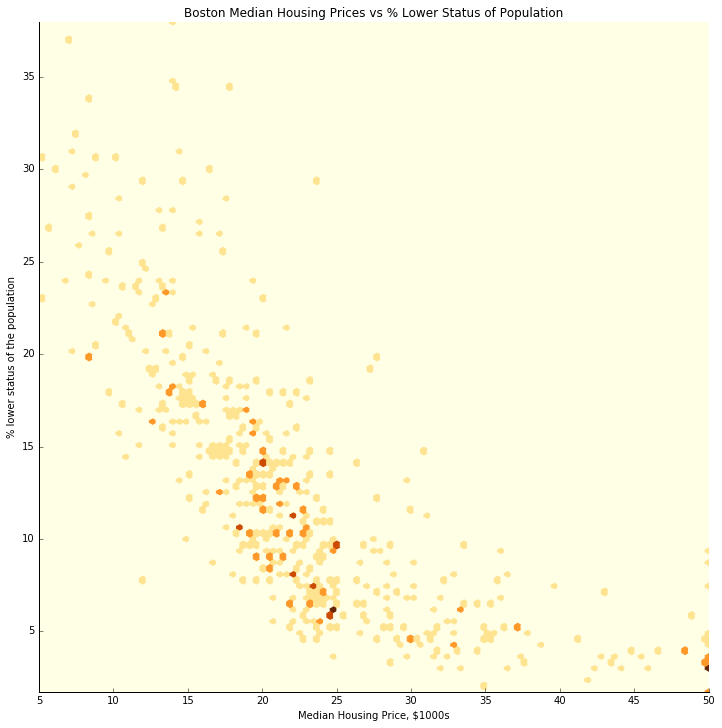

In [147]:
%matplotlib inline
import matplotlib.pyplot as plt 

fig, ax = plt.subplots(figsize=(12,12))
y = boston['LSTAT']
x = boston['MEDV']
# ax.scatter(x, y, color='blue')
ax.hexbin(x, y, cmap=plt.cm.YlOrBr)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
xmin = x.min()
xmax = x.max()
ymin = y.min()
ymax = y.max()
plt.axis([xmin, xmax, ymin, ymax])

plt.ylabel('% lower status of the population')
plt.xlabel('Median Housing Price, $1000s')
plt.title('Boston Median Housing Prices vs % Lower Status of Population')
plt.show()